In [2]:
%reload_ext autoreload
%autoreload 2

import os
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import plot_utils as pu
import utils as ut

# matplotlib font monospace
mpl.rcParams['font.family'] = 'monospace'

Read, prepare and interpolate the data. Here we do an example for the star with 1 solar masses

In [6]:
fold = '../data/geneva_models/'
table_dic = ut.read_data(fold)

# Choose the mass 
mass_sel = 1

tab0 = [tab for tabname, tab in table_dic.items() if np.round(tab['mass'][0],1) == mass_sel][0]
time = tab0['time']
dt = np.diff(time)
dt[dt == 0] = np.nan
min_dt = np.nanmin(dt)
t_uni = np.arange(time[0], time[-1], min_dt)
M = len(t_uni)

# Interpolate values form table
tab = ut.interp_data(tab0, M=M)


Add the color of the star to the data with custom function

In [7]:
colors = [ut.get_planck_color(T) for T in 10**(np.array(tab['lg(Teff)']))]
tab['color'] = np.array(colors)
colors = [list(color_) for color_ in list(tab['color'])]
tab_s = {}
tab_s['color'] = colors
for key, val in tab.items():
    if key != 'color':
        tab_s[key] = list(tab[key])

time = tab_s['time']
radius = tab_s['radius']
lum = 10**np.array(tab_s['lg(L)'])/1000
colors = tab_s['color']

Save the data

In [ ]:
savefold = '../results/'
if not os.path.exists(savefold):
    os.makedirs(savefold)

with open(savefold + f'data_{mass_sel}.json', 'w') as file:
    json.dump(tab_s, file)

Prepare folder for the figure

In [26]:
fig_size, rat = 720, 2.2
ts = 1.25
hspace=0.125
wspace = 0.25

savefold = f'figures/mass_{mass_sel}/pngs/'
if not os.path.exists(savefold):
    os.makedirs(savefold)

for file in os.listdir(savefold):
    os.remove(savefold + file)


We use this custom function to create the basic frame of the figure

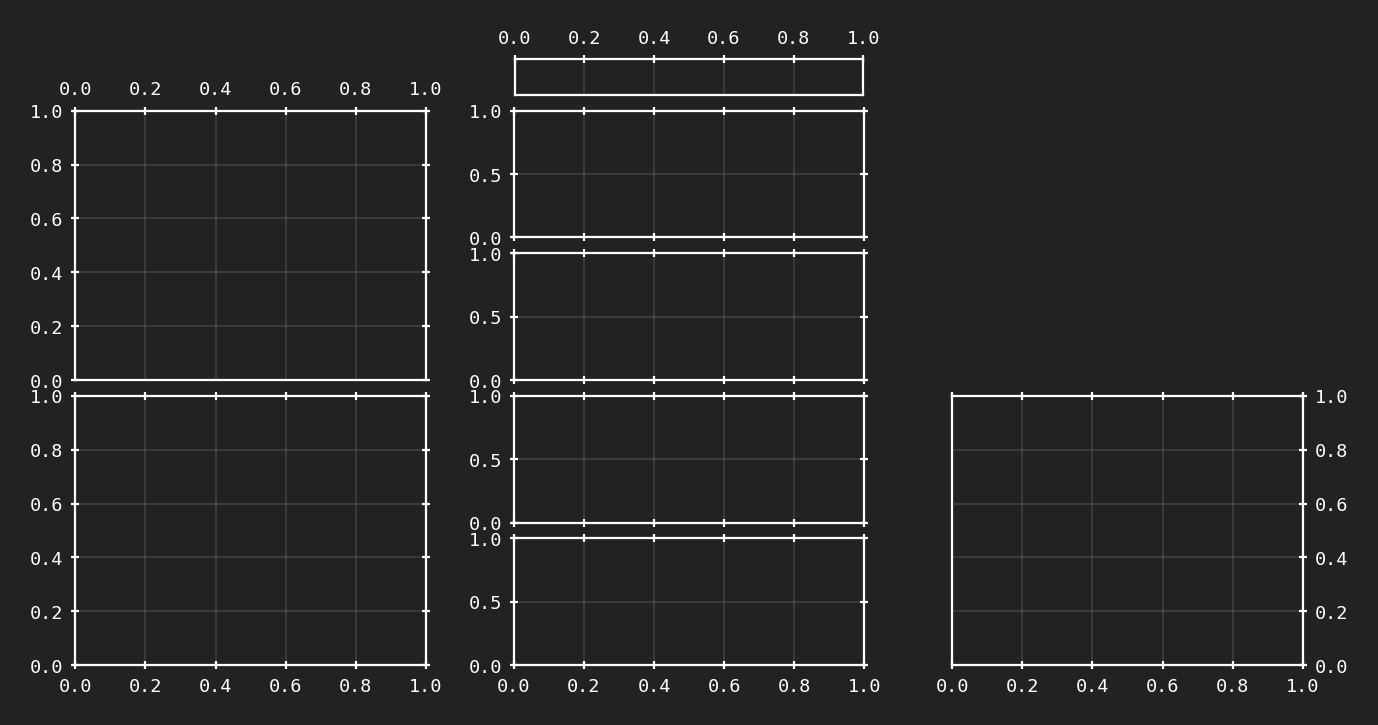

In [27]:
fig, axs, ax_time, fs = pu.initialize_figure_(fig_size=fig_size, ratio=rat, ts=ts,
                            hspace=hspace, wspace=wspace,  wr=[1,1,1])

Now we the animation. Each frame is saved and the video is render with ffmpeg commands

In [30]:
fps = 10  # frames per second

fig, axs, ax_time, fs = pu.initialize_figure_(fig_size=fig_size, ratio=rat, ts=ts,
                            hspace=hspace, wspace=wspace,  wr=[1,1,1])

new_ax = fig.add_axes([0.585, 0.5, 0.4, 0.4], anchor='C', zorder=1)


new_ax.set_aspect('equal')
new_ax.set_xticks([])
new_ax.set_yticks([])

for spine in new_ax.spines.values():
    spine.set_linewidth(fs * 0.05)
    spine.set_color('w')


steps = list(range(len(tab_s['time'])))

for i, step in enumerate(steps):

    # This you would add if you had images to add to the top right panel
    # image = plt.imread(paths[steps[i]])
    # image_plt = new_ax.imshow(image)

    if i == 0:
        first = True
        sst = 0
        tt = np.concatenate((np.array([0]), time[sst:steps[i]]))
        tss = time[1]-time[0]
    else:
        sst = steps[i]
        tt = time[steps[i-1]:steps[i]]
        first = False
        tss = time[sst] - time[sst-1]

    color = ut.get_planck_color(10**np.array(tab_s['lg(Teff)'])[step])
    pie1, pie2 = pu.plot_pies(axs[1][2], fs, tab_s, step=step, cmap='gist_rainbow', first=first)

    ax_mid = [axs[0][1], axs[1][1], axs[2][1], axs[3][1]]
    for ax in ax_mid:
        ax.set_xlim(time[0], time[i])

    scs = pu.plot_mid(ax_mid, fs, tab_s, steps=steps, i=i, color=color, first=first,
                      fact_lum=1)

    scat_rhoc = pu.plot_rhoc_tc(axs[1][0], fs, tab_s, steps=steps, i=i, color=color, first=first)

    scat_hr = pu.plot_hr(axs[0][0], fs, tab_s, steps=steps, i=i, color=color, first=first)

    ax_time.set_xlim(0, time[-1])
    fill = ax_time.fill_between(tt, 0, 1, color=color, lw=0.2*fs)

    text_time = ax_time.text(0.025, 0.5, f'Age: {time[step]:0.02f} Myr', fontsize=ts*fs, color='darkgray', ha='left', va='center', zorder=2, transform=ax_time.transAxes)

    text = f'{fps*tss:0.03f} Myr/second'
    text_speed = fig.text(0.695,0.91, text, fontsize=1.2*ts*fs, color='w', ha='left', va='bottom', zorder=2, transform=fig.transFigure)


    figname = f'render_{step:04d}.png'
    savepath1 = savefold + figname

    fig.savefig(savepath1, dpi=300, bbox_inches='tight')

    for sc_ in scat_rhoc:
        sc_.remove()
    
    for sc_ in scat_hr:
        sc_.remove()

    for p in pie1:
        for a in p:
            a.remove()
    for p in pie2:
        for a in p:
            a.remove()

    text_time.remove()
    text_speed.remove()

    # image_plt.remove()

    for sc in scs:
        sc.remove()

    plt.close()

    print(f'{i}/{len(steps)} frames.', end='\r')


C:\Users\Pere\AppData\Local\Temp\ipykernel_20168\823796025.py:42: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(time[0], time[i])
c:\Users\Pere\Documents\ULL\subjects\q1\estructura_y_evolucion_estelar_O\projects\stellar_evolution_models\infographic\plot_utils.py:290: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
c:\Users\Pere\Documents\ULL\subjects\q1\estructura_y_evolucion_estelar_O\projects\stellar_evolution_models\infographic\plot_utils.py:496: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  Tc[

[(4.5, -0.5), (4.4000000000000004, -0.5), (4.25, -2.5), (4.0, -2.5), (4.0, -3.0), (4.25, -3.0), (4.4000000000000004, -2.0), (4.5, -0.5)]


Convert to video

In [31]:
pu.png_to_mp4(savefold, fps=fps, title=f'video_example', extension='.png')